**Mascaramento de imagens**

Permite visualizar as regiões da imagem que são de interesse. Ela permite recortar a imagem de qualquer formato.

Operadores: And e OR
- AND: Obtém apenas os elementos em comum em ambas as imagens;
- OR: Obtém a combinação de todos os elementos das imagens.

Permite também obter um ROI. Além de permitir extrair a região de interesse e colocá-la em um fundo diferente.


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [2]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

In [3]:
img = cv2.imread('/content/imagens/paisagem01.jpg')

In [5]:
altura, largura = img.shape[:2]

In [6]:
altura, largura

(389, 620)

In [7]:
mascara = np.zeros((altura, largura), dtype='uint8')

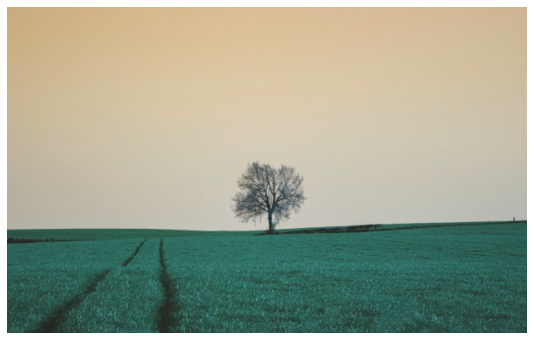

In [8]:
mostrar_imagem(img)

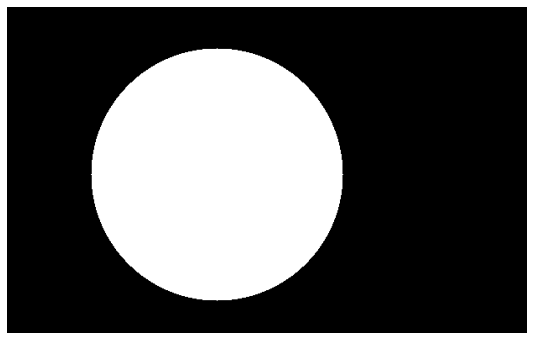

In [9]:
# Extraindo a região
cv2.circle(mascara, (250,200), # Posição do círculo 
           150, # Tamanho do círculo
           255, # Cor
           -1 # Borda
           )
mostrar_imagem(mascara)

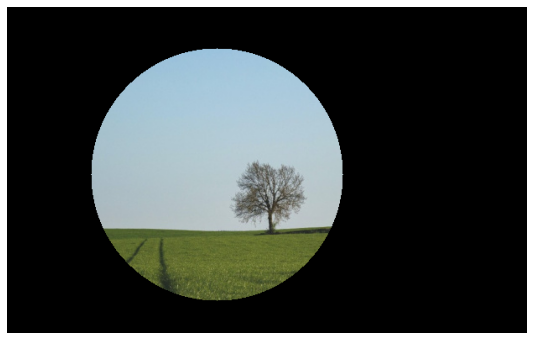

In [11]:
img_final = cv2.bitwise_and(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(img, cv2.COLOR_BGR2RGB), mask=mascara) # Obtem o que tem em comum entre as duas imagens
mostrar_imagem(img_final)

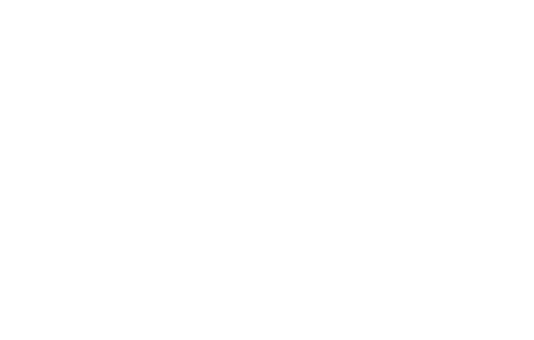

In [12]:
fundo_branco = 255 * np.ones((altura, largura, 3), dtype='uint8')
mostrar_imagem(fundo_branco)

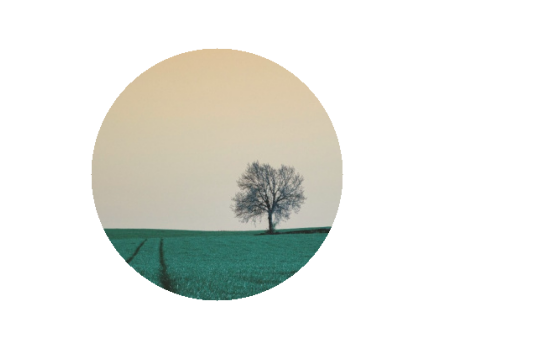

In [13]:
img_final = img.copy()
img_final[mascara == 0] = fundo_branco[mascara == 0]
mostrar_imagem(img_final)

In [16]:
fundo = cv2.imread('/content/imagens/montanha.jpg')
fundo = cv2.resize(fundo, (largura, altura))

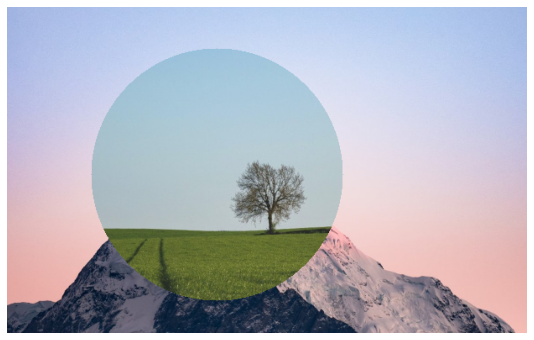

In [19]:
img_final[mascara == 0] = fundo[mascara == 0]
mostrar_imagem(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))

**Isolando o objeto**

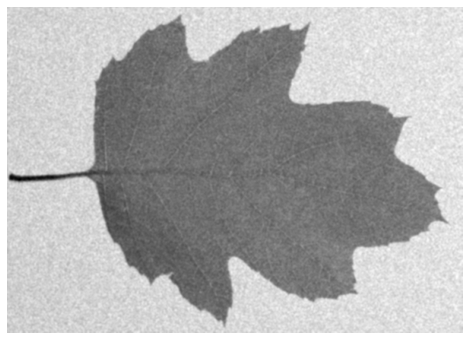

In [20]:
img = cv2.imread('/content/imagens/folha_ruido.jpg')
altura, largura = img.shape[:2]
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
desfoque = cv2.GaussianBlur(imgCinza, (5,5), 0)
mostrar_imagem(desfoque)

139.0


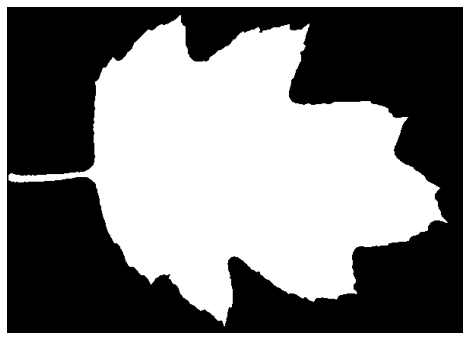

In [21]:
valor, mascara = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(valor)
mostrar_imagem(mascara)

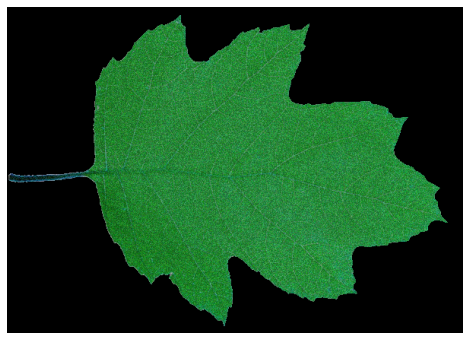

In [22]:
img_final = cv2.bitwise_and(img, img, mask = mascara)
mostrar_imagem(img_final)

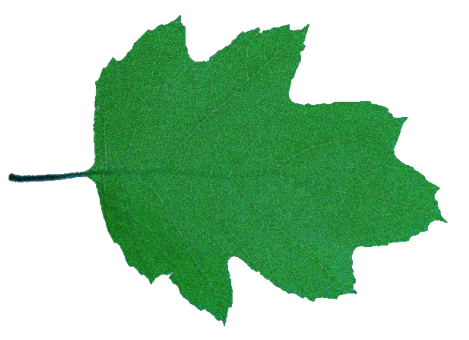

In [24]:
fundo_branco = 255 * np.ones((altura, largura, 3), dtype = 'uint8')
img_final = img.copy()
img_final[mascara == 0] = fundo_branco[mascara == 0]
mostrar_imagem(img_final)

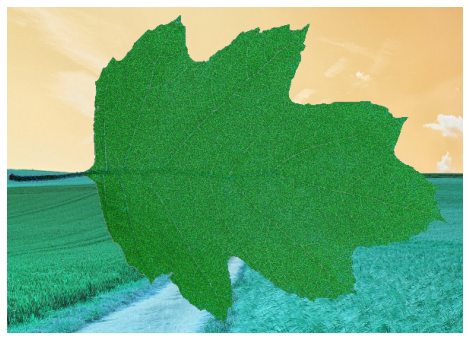

In [25]:
fundo = cv2.imread('/content/imagens/paisagem03.jpg')
fundo = cv2.resize(fundo, (largura, altura))
img_final[mascara == 0] = fundo[mascara == 0]
mostrar_imagem(img_final)